# Data Pre Processing
## For Regression(part 1)

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
d=pd.read_csv('g-9.csv')

In [ ]:
for j in range(1,13):
  
 rand = np.random.choice(1000, 100)
 #print((rand))
 for i in rand:
    d.iloc[i,j] = np.nan 
d.to_csv('g-9-w.csv')

In [15]:
d=pd.read_csv('g-9-w.csv')
d=d.iloc[:,1:]

In [16]:
d.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,241.563114,1.765998,NaN,0.031411,5.366491,NaN,NaN,0.193558,9.669047,2.622698,0.893650,8.990137,7.755609
1,198.227373,1.776363,1.361389,0.761303,NaN,10.484468,3.563069,0.011895,8.639422,8.343507,0.978851,9.139275,6.104601
2,216.344886,NaN,1.660602,0.349677,3.443069,15.217140,3.352647,0.058478,NaN,NaN,1.426715,9.024671,8.548405
3,300.023360,1.775124,1.243572,0.458525,4.826173,14.434667,3.650156,0.310368,3.788514,2.603179,0.765714,9.111226,14.122465
4,126.778394,1.778930,NaN,0.581080,6.288740,3.822806,3.334817,0.766095,NaN,3.543636,0.395943,9.022079,7.664536


In [17]:
d.shape

(1000, 13)

### Correlation Matrix

In [18]:
corr = d.iloc[:,:].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
y,1,-0.00305,0.0349,-0.0118,0.242,0.359,-0.0155,0.00937,0.715,0.144,0.0451,-0.0144,0.347
x1,-0.00305,1,0.0219,0.0598,0.063,-0.0183,0.0266,-0.0597,0.0114,0.0238,0.0227,-0.0133,-0.00798
x2,0.0349,0.0219,1,0.00572,-0.0055,-0.0491,-0.00802,-0.00367,0.0256,0.0343,-0.0248,-0.0258,0.0202
x3,-0.0118,0.0598,0.00572,1,-0.0664,-0.0522,-0.0267,-0.0295,-0.0312,0.0364,0.00499,-0.0126,-0.00495
x4,0.242,0.063,-0.0055,-0.0664,1,0.0201,0.0158,0.0195,-0.0706,-0.0109,0.0316,0.0345,0.0328
x5,0.359,-0.0183,-0.0491,-0.0522,0.0201,1,0.00794,0.0112,-2.42e-05,0.0605,0.0822,-0.0141,0.0539
x6,-0.0155,0.0266,-0.00802,-0.0267,0.0158,0.00794,1,-0.0142,-0.037,0.0111,-0.0576,0.0176,0.0472
x7,0.00937,-0.0597,-0.00367,-0.0295,0.0195,0.0112,-0.0142,1,0.00927,-0.013,0.0106,0.00757,0.00902
x8,0.715,0.0114,0.0256,-0.0312,-0.0706,-2.42e-05,-0.037,0.00927,1,0.0364,0.0145,-0.00807,-0.00549
x9,0.144,0.0238,0.0343,0.0364,-0.0109,0.0605,0.0111,-0.013,0.0364,1,-0.0309,0.0487,-0.00725


### Box Plot

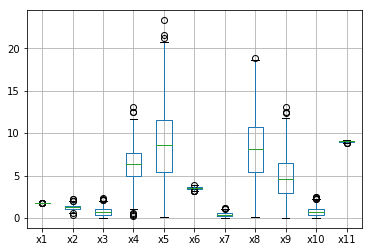

In [19]:
d.iloc[:,1:12].boxplot()

### Scatter Matrix

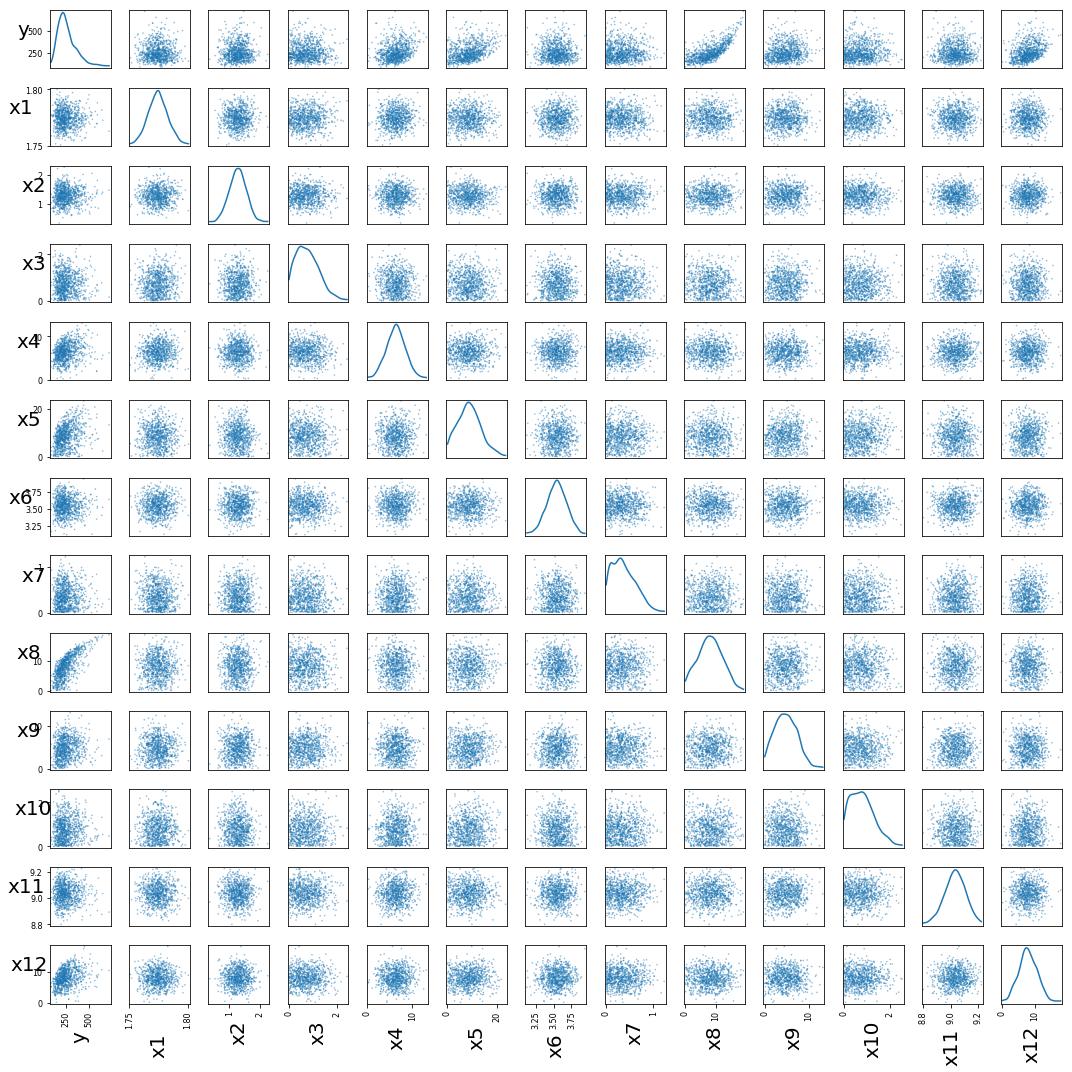

In [22]:
scatter_matrix=pd.plotting.scatter_matrix(d.loc[:, "y":"x12"],
    figsize  = [15, 15],
    marker   = ".",
    s        = 10,
    diagonal = "kde")
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0)
plt.tight_layout()
plt.show()

### Outlier Removal

In [23]:
# for clipping outlier using IQR 
d=d.astype(float)
for col in range(1,13):
    q1, q3= np.percentile(d.iloc[:,col],[25,75])
    iqr = q3 - q1;
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) # 1.5 times can be changed
    d[d.columns[col]][d.iloc[:,col]<=lower_bound]=lower_bound;
    d[d.columns[col]][d.iloc[:,col]>=upper_bound]=lower_bound;
    col_mean=d.iloc[:,col].mean()
    d.iloc[:,col].fillna(col_mean,inplace=True)
d.rename(columns={'y':'Y'}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


### Scaling of data

In [24]:
dat = d
mean=dat.mean(axis=0)
std = dat.std(axis=0)
for j in range(1,13):
  for i in range(0,1000):
    dat.iloc[i,j] = dat.iloc[i,j] - mean[j]
    dat.iloc[i,j] = dat.iloc[i,j]/std[j]


In [ ]:
dat.to_csv('g9-proc-reg.csv')
# Final file for regression

## Data Precessing for Classification
## Part 2

In [25]:
# for clipping outlier using IQR 
d=pd.read_csv('g-9-w.csv')
d=d.iloc[:,1:14].astype(float)
for col in range(1,13):
    q1, q3= np.percentile(d.iloc[:,col],[25,75])
    iqr = q3 - q1;
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) # 1.5 times can be changed
    d[d.columns[col]][d.iloc[:,col]<=lower_bound]=lower_bound;
    d[d.columns[col]][d.iloc[:,col]>=upper_bound]=lower_bound;
    col_mean=d.iloc[:,col].mean()
    d.iloc[:,col].fillna(col_mean,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [26]:
d.columns

Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12'],
      dtype='object')

In [27]:
#Discretization of Y
level=(max(d.y)-min(d.y))/5.0
l1=min(d.y)+level
l2=l1+level
l3=l2+level
l4=l3+level
d['y'].loc[d.y<=l1]=1
d['y'].loc[(d.y>l1) & (d.y<=l2)]=2
d['y'].loc[(d.y>l2) & (d.y<=l3)]=3
d['y'].loc[(d.y>l3) & (d.y<=l4)]=4
d['y'].loc[d.y>l4]=5

In [28]:
#discretizatio of predictor 1
pred1=d.columns[6]
level=(max(d[pred1])-min(d[pred1]))/3.0
l1=min(d[pred1])+level
l2=l1+level
d[pred1].loc[d[pred1]<=l1]=1
d[pred1].loc[(d[pred1]>l1) & (d[pred1]<=l2)]=2
d[pred1].loc[d[pred1]>l2]=3

In [29]:
#discretizatio of predictor 2
pred2=d.columns[8] # any predictor can be chosen randomly; Here chosen X9
level=(max(d[pred2])-min(d[pred2]))/5.0
l1=min(d[pred2])+level
l2=l1+level
l3=l2+level
l4=l3+level
d[pred2].loc[d[pred2]<=l1]=1
d[pred2].loc[(d[pred2]>l1) & (d[pred2]<=l2)]=2
d[pred2].loc[(d[pred2]>l2) & (d[pred2]<=l3)]=3
d[pred2].loc[(d[pred2]>l3) & (d[pred2]<=l4)]=4
d[pred2].loc[d[pred2]>l4]=5

In [ ]:
d.to_csv('g-09-w2.csv',index=False)
# This is the final file for classification